In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv(r"C:\Users\Dell\AppData\Local\Temp\Rar$DIa14980.26447\train_u6lujuX_CVtuZ9i.csv")
test_data=pd.read_csv(r"C:\Users\Dell\AppData\Local\Temp\Rar$DIa14980.19651\test_Y3wMUE5_7gLdaTN.csv")

In [3]:
df=pd.concat([train_data,test_data],ignore_index=True)

In [4]:
df.shape

(981, 13)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
df['Property_Area'].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

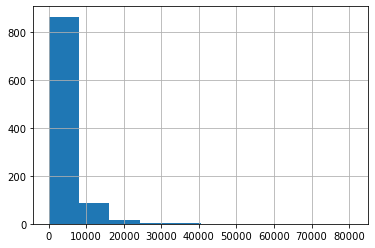

In [8]:
df['ApplicantIncome'].hist()

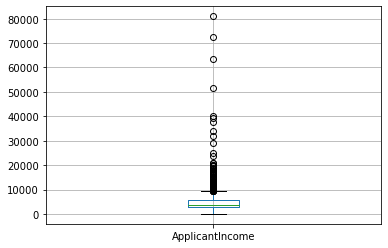

In [9]:
df.boxplot(column='ApplicantIncome')

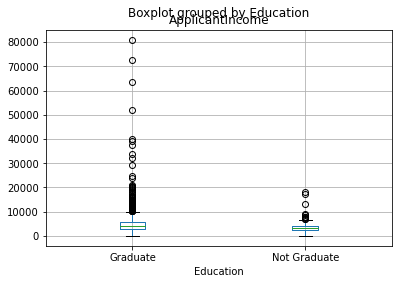

In [10]:
df.boxplot(column='ApplicantIncome',by='Education')

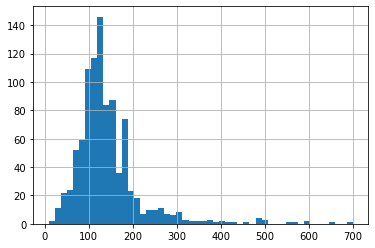

In [11]:
df['LoanAmount'].hist(bins=50)

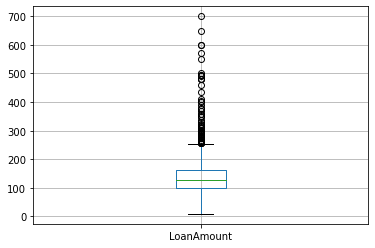

In [12]:
df.boxplot(column='LoanAmount')

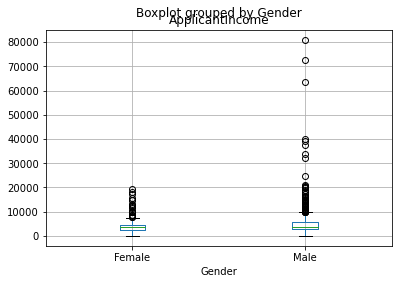

In [13]:
df.boxplot(column='ApplicantIncome',by='Gender')

In [14]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [17]:
loan_approval=df['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


In [31]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True,normalize=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.145390,0.012411,0.157801
1.0,0.171986,0.670213,0.842199
All,0.317376,0.682624,1.000000


In [19]:
temp1=df['Credit_History'].value_counts(ascending=True)
temp2=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0    148
1.0    754
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


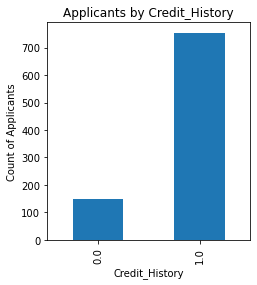

In [24]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

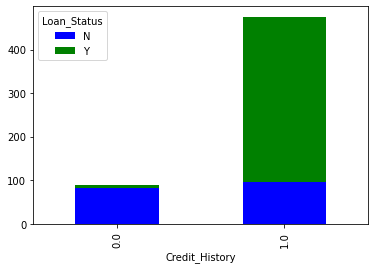

In [30]:
temp4=pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp4.plot(kind='bar',stacked=True,color=['blue','green'])

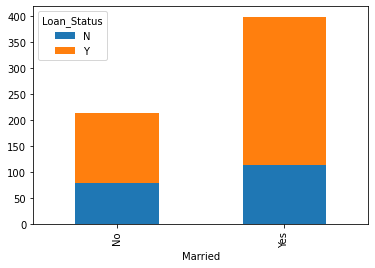

In [34]:
pd.crosstab(df.Married,df.Loan_Status).plot(kind='bar',stacked=True)

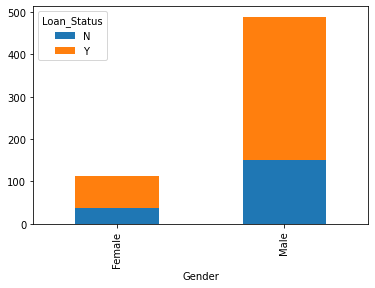

In [35]:
pd.crosstab(df.Gender,df.Loan_Status).plot(kind='bar',stacked=True)

In [36]:
df['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

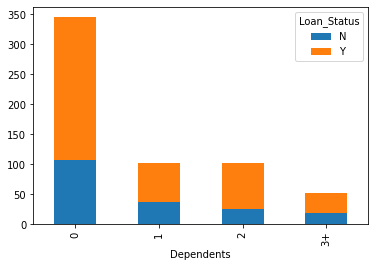

In [37]:
pd.crosstab(df.Dependents,df.Loan_Status).plot(kind='bar',stacked=True)

In [38]:
pd.crosstab(df.Dependents,df.Loan_Status,normalize='index')

Loan_Status,N,Y
Dependents,,
0,0.310145,0.689855
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


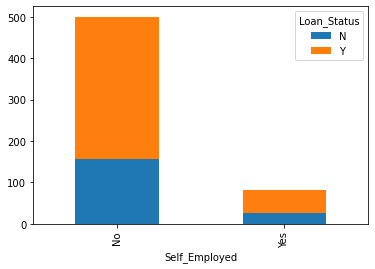

In [40]:
pd.crosstab(df.Self_Employed,df.Loan_Status).plot(kind='bar',stacked=True)

In [41]:
pd.crosstab(df.Self_Employed,df.Loan_Status,normalize='index')

Loan_Status,N,Y
Self_Employed,,
No,0.314000,0.686000
Yes,0.317073,0.682927


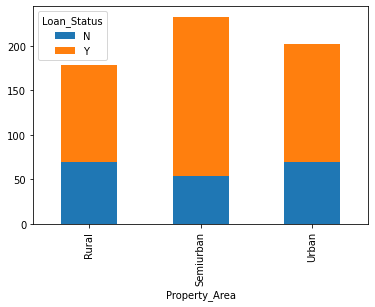

In [42]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind='bar',stacked=True)

In [43]:
pd.crosstab(df.Property_Area,df.Loan_Status,normalize='columns')

Loan_Status,N,Y
Property_Area,,
Rural,0.359375,0.260664
Semiurban,0.281250,0.424171
Urban,0.359375,0.315166


In [44]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [45]:
df['Self_Employed'].fillna('No',inplace=True)

In [50]:
df['LoanAmount'].isnull().sum()

0

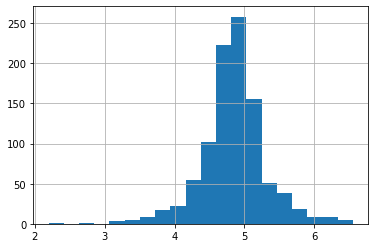

In [51]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

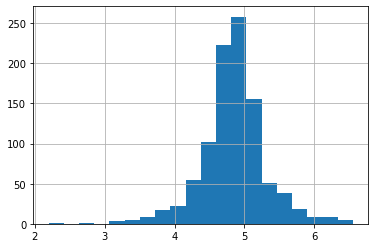

In [52]:
df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20)

In [53]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
LoanAmount_log         0
TotalIncome            0
TotalIncome_log        0
dtype: int64

In [54]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)